In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import os
import sys
import re
import pdb
import glob
import weblogolib

%matplotlib inline
plt.ion()
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
# Load efficiency files
results_dir = '17.07.18_results'
efficiency_files = glob.glob(results_dir+'/efficiency.*.txt')
efficiency_df = pd.DataFrame()
for f in efficiency_files:
    tmp_df = pd.read_csv(f,sep='\t')
    efficiency_df = efficiency_df.append(tmp_df,ignore_index=True)
efficiency_df.head()

,LID,raw_reads,sorted_reads,parsed_reads,frac_sorted,frac_parsed,group,description
0,296800,125579903,43426180,34232178,0.345805,0.272593,brca2_11nt,brca2_11nt_ssbc
1,296831,174865845,61115177,53912400,0.349498,0.308307,brca2_11nt,brca2_11nt_exon
2,296963,144020009,68364264,61073267,0.474686,0.424061,brca2_11nt,brca2_11nt_total
3,297460,166111829,47034770,32488055,0.283151,0.195579,brca2_11nt,"brac2_9nt_jct, brca2_11nt_jct"
4,296799,150111828,73082680,61738865,0.486855,0.411286,brca2_9nt,brca2_9nt_ssbc


In [3]:
# Compute total number of reads
tmp_df = efficiency_df[['LID','raw_reads']].groupby('LID').median()
print 'Total number of raw_reads: %.2e'%tmp_df.sum()

# Compute total number of sorted reads
print 'Total number of sorted_reads: %.2e'%efficiency_df['sorted_reads'].sum()

# Compute total number of parsed
print 'Total number of parsed_reads: %.2e'%efficiency_df['parsed_reads'].sum()

Total number of raw_reads: 2.26e+09
Total number of sorted_reads: 9.23e+08
Total number of parsed_reads: 7.69e+08


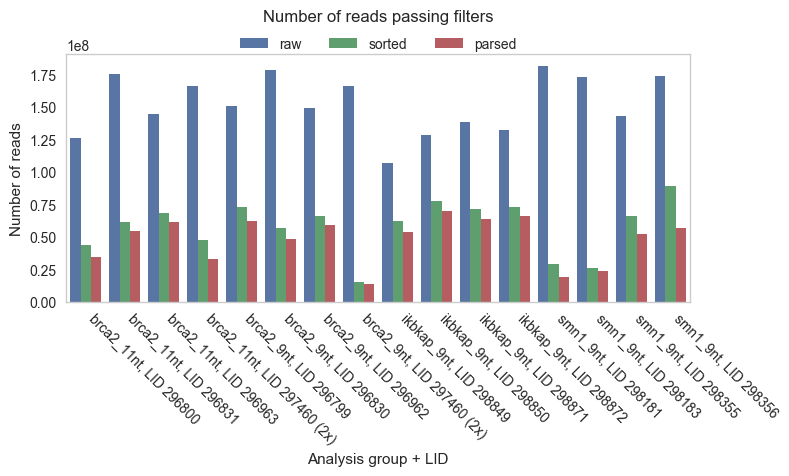

In [7]:
# Reformat data to num reads as one column and stage as a second column
df = pd.DataFrame()
for col in ['raw_reads','sorted_reads','parsed_reads']:
    tmp_df = pd.DataFrame()
    tmp_df['label'] = efficiency_df['group'].astype(str) +\
        ', LID ' + efficiency_df['LID'].astype(str) +\
         [(' (2x)' if 297460==lid else '') for lid in efficiency_df['LID']] 
    tmp_df['num_reads'] = efficiency_df[col]
    tmp_df['stage']=col.split('_')[0]
    df = df.append(tmp_df,ignore_index=True)

# Make figure
plt.figure(figsize=[8,5])
    
# Make barplot
ax = sns.barplot(x='label',y='num_reads', hue='stage', data=df)

# Fix x labels
xticklabels = list(df['label'][df['stage']=='raw'])
ax.set_xticklabels(xticklabels,rotation=-45,horizontalalignment='left')

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=3)
ax.set_xlabel('Analysis group + LID')
ax.set_ylabel('Number of reads')
ax.set_title('Number of reads passing filters',y=1.1)
plt.tight_layout()
plt.savefig('plots/pipeline_reads.pdf')

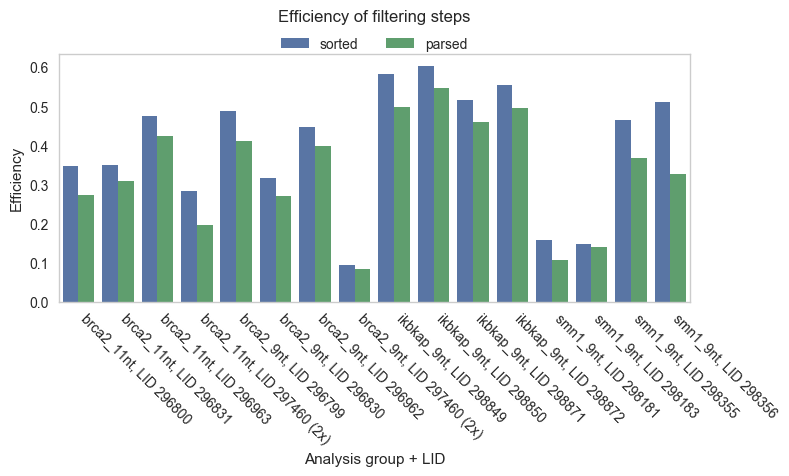

In [8]:
# Reformat data to frac as one column and stage as a second column
df = pd.DataFrame()
for col in ['frac_sorted','frac_parsed']:
    tmp_df = pd.DataFrame()
    tmp_df['label'] = efficiency_df['group'].astype(str) +\
        ', LID ' + efficiency_df['LID'].astype(str) +\
         [(' (2x)' if 297460==lid else '') for lid in efficiency_df['LID']] 
    tmp_df['frac'] = efficiency_df[col]
    tmp_df['stage']=col.split('_')[1]
    df = df.append(tmp_df,ignore_index=True)

# Make figure
plt.figure(figsize=[8,5])
    
# Make barplot
ax = sns.barplot(x='label',y='frac', hue='stage', data=df)

# Fix x labels
xticklabels = list(df['label'][df['stage']=='sorted'])
ax.set_xticklabels(xticklabels,rotation=-45,horizontalalignment='left')

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
ax.set_xlabel('Analysis group + LID')
ax.set_ylabel('Efficiency')
ax.set_title('Efficiency of filtering steps',y=1.1)
plt.tight_layout()
plt.savefig('plots/pipeline_efficiency.pdf')